# Pr√°ctica 6: Dise√±o de filtros



*   Antonia Yepes Quintero
*   Isabella Bedoya Orozco


Los filtros digitales permiten la manipulaci√≥n de caracter√≠sticas frecuenciales de se√±ales digitales debidamente muestreadas. Frente a los filtros anal√≥gicos cuentan con las siguientes ventajas:

* Respuesta din√°mica: El ancho de banda est√° limitado por la frecuencia de muestreo de la se√±al en lugar del comportamiento el√©ctrico de los amplificadores operacionales.

* Intervalo din√°mico: El n√∫mero de bits usados durante la cuantizaci√≥n de la se√±al son los que determinan el rango m√≠nimo de valores que producir√° el filtro.

* Conmutabilidad: Es posible almacenar en un sistema digital los par√°metros del filtro y aplicarlo a m√∫ltiples se√±ales.

* Adaptabilidad: Se pueden construir en software o hardware.

* Ausencia de problemas por los componentes: Al no usar componentes f√≠sicos no hay problemas con las tolerancias de estos, ni con el manejo de impedancia o el acople de etapas.

Se debe tener en cuenta que:  

* Los filtros IIR producen en general distorsi√≥n de fase, es decir la
fase no es lineal con la frecuencia.  

* Los filtros FIR se pueden calcular a partir de los filtros IIR, no se cumple en el caso contrario.  

* Los filtros FIR son de fase lineal.  

* El orden de un filtro IIR es mucho menor que uno FIR para unas especificaciones dadas.  

* Los filtros FIR son siempre estables.  

## Filtros FIR

Un sistema de respuesta finita al impulso, tiene una respuesta al impulso unitario que tienen un n√∫mero limitado de t√©rminos. Estos sistemas son generalmente no recursivos, es decir, no requieren ninguna realimentaci√≥n de la salida para su computaci√≥n. La salida del sistema depende solo de valores presentes y pasados de la entrada.

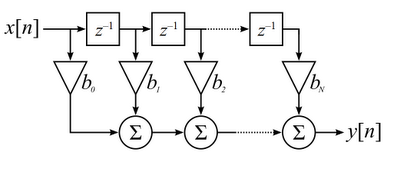

Recordemos que la relaci√≥n de entrada salida de un sistema equivale a su funci√≥n de transferencia, y teniendo en cuenta que una ecuaci√≥n en diferencias puede ser expresada en terminos de a transformada Z, tenemos:

$y[n]=\sum_{i=1}^{N}w_ix[n-i]$

es equivalente a:

$Y[z]=\sum_{i=1}^Nb_iz^{-i}X[z]$

Por lo tanto:

$\frac{Y[z]}{X[z]}=\sum_{i=1}^Nb_iz^{-i}=H[z]$

De tal forma que la soluci√≥n del sistema en el dominio de z, se resuelve por:

$Y[z]=H[z]X[z]$

Recordemos que un filtro en el dominio del tiempo se resuelve como una convoluci√≥n de la se√±al con los coeficientes del filtro:

$y[n]=h[n]*x[n]$

vemos entonces que una convoluci√≥n en el tiempo equivale a una multiplicaci√≥n en z.:

En resumen podemos ver que la funcion de trasferencias esta dada por:

$H[z]=\frac{Y[z]}{X[z]}$

## Filtros IIR

Los filtros IIR presentan una respuesta infinita al impulso y la salida depende tanto de valores presentes y pasados de la entrada, como de valores pasados de la salida. Por lo anterior los filtros IIR son sistemas realimentados y por lo tanto es necesario evaluar su estabilidad (polos diferentes de cero).

La funci√≥n de transferencia de un filtro IIR es de la siguiente forma:
\begin{equation}
H[z]=\frac{b_0+b_1z^{-1}+b_2z^{-2}+...+b_nz^{-n}}{1-a_1z^{-1}-a_2z^{-2}...-a_nz^{-n}}=\frac{\sum_{i=0}^{N}b_1z^{-i}}{1-\sum_{i=0}^{N}a_iz^{-1}}=\frac{Y[z]}{X[z]}
\end{equation}

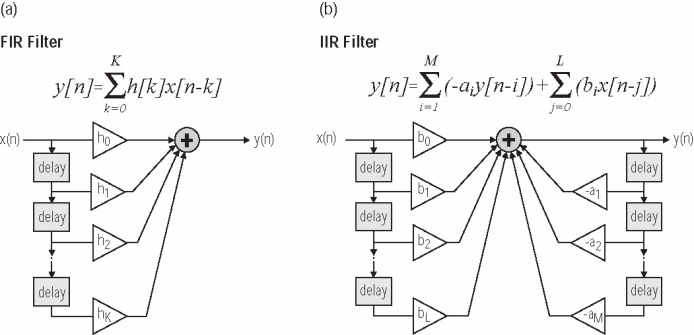

Para evaluar la estabilidad de los sitemas realimentados, es necesario revisar la teoria de la transformada Z.

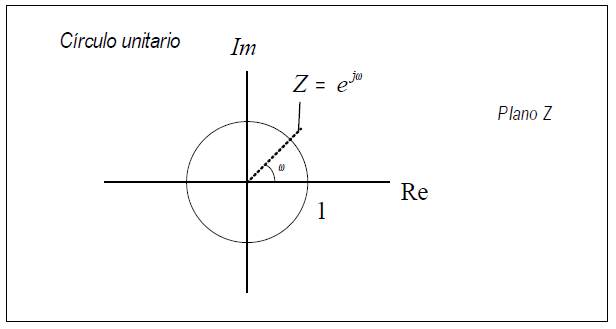

En un sistema es importante evaluar los ceros y los polos a partir de

---

la funci√≥n de transferencia:

*   Ceros:  Las soluciones que hacen el numerador igual a cero
*   Polos: Las soluciones que hacen el denominador igual a cero.

En el plano z se puede determinar si un sistema es estable si los polos

est√°n dentro del circulo unitario. Los ceros no tienen incidencia en la estabilidad, por lo tanto pueden estar ubicados en cualquier lugar del plano z.


## Ejercicio

Proponga una secuencia sinusoidal x_e (n), con 0‚â§n‚â§1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta se√±al es una se√±al biol√≥gica, la cual se origina por alg√∫n proceso electrofisiol√≥gico, y que se registrar√° sobre la superficie de la piel mediante un sistema electr√≥nico. El viaje de la se√±al hipot√©tica x_e (n) a trav√©s de los diversos tejidos genera una atenuaci√≥n en la amplitud y un retraso temporal. El efecto del sistema electr√≥nico de registro sobre la se√±al de inter√©s es la adici√≥n de ruido gaussiano a la se√±al. La se√±al registrada finalmente es de la forma:

y_e(n) = Œ±x_e(n-D)+w(n)

Donde Œ± representa la amplitud, D es un retraso debido a la conducci√≥n a trav√©s de los diversos tejidos y w(n)  representa el ruido generado por la electr√≥nica de los sistemas de adquisici√≥n.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza œÉ^2=0,01, establezca Œ±=0,8 y un retraso D=15 muestras. Grafique ambas se√±ales.


In [ ]:
# importaci√≥n de librer√≠as
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from google.colab import drive

## Creaci√≥n de la se√±al:

### Se√±al hipot√©tica ùë•ùëí(ùëõ)

Text(0.5, 0, 'Tiempo (s)')

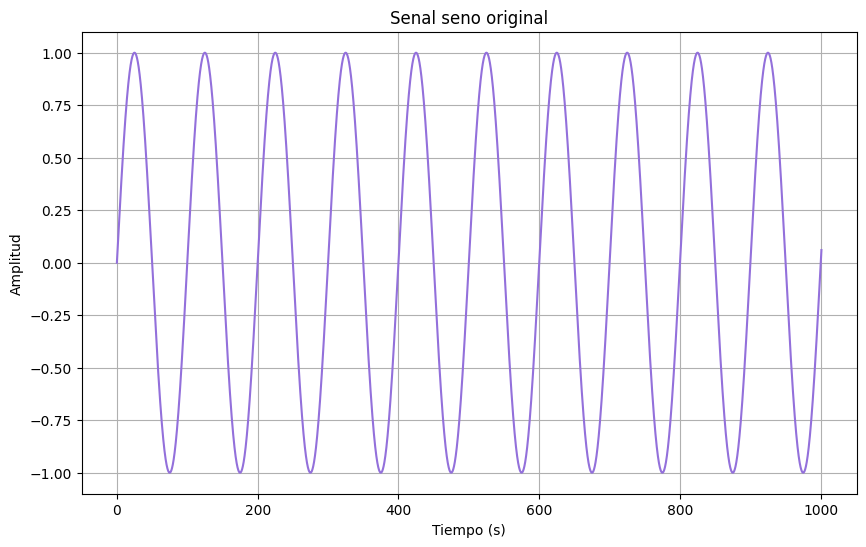

In [ ]:
Fs = 25
F0 = 0.01
t = np.arange(0,1001, 1/Fs)
xe = np.sin(2*np.pi*F0*t)

plt.figure(figsize=(10, 6))
plt.plot(t,xe,color="mediumpurple")
plt.grid(True)
plt.title("Senal seno original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

#### Creaci√≥n de x_e, y_e, w_e

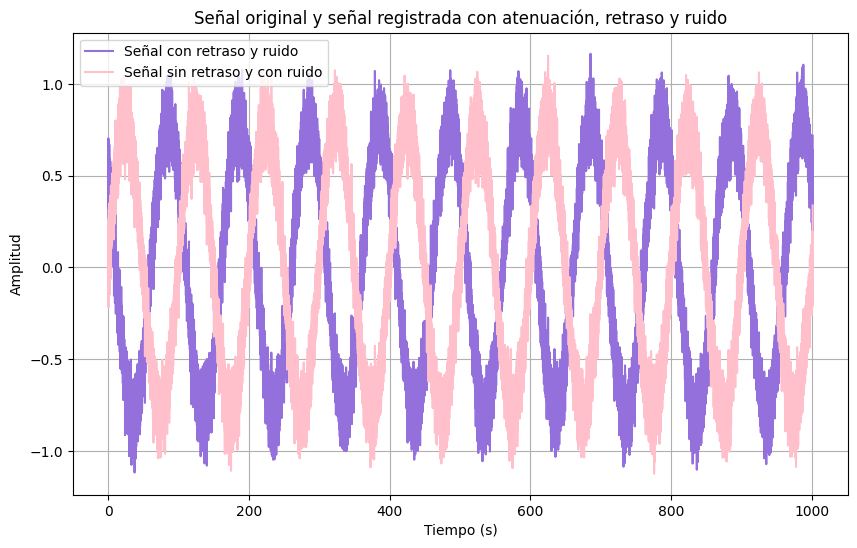

In [ ]:
# creaci√≥n de x_e, y_e, w_e
alfa = 0.8 # atenuaci√≥n
D = 15 # retrado inducido en la adquisici√≥n
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)+D) # potencial con retraso
x_e2 = np.sin(2*np.pi*F0*(n+15/Fs))
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # se√±al adquirida con ruido y retrado.
y_e2 = alfa*x_e2 + w # se√±al adquirida sin ruido

plt.figure(figsize=(10, 6))
plt.plot(n, y_e, color="mediumpurple", label="Se√±al con retraso y ruido")
plt.plot(n, y_e2, color="pink", label="Se√±al sin retraso y con ruido")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.title("Se√±al original y se√±al registrada con atenuaci√≥n, retraso y ruido")
plt.legend()
plt.grid(True)
plt.show()


La funci√≥n firwin permite dise√±ar un filtro FIR utilizando el m√©todo de ventanas, donde los principales argumentos de entrada son

*   N: Orden del filtro
*   W_n: Frecuencia de corte.

Para filtros digitales W_n est√° normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la se√±al. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

## Filtro FIR

#### Dise√±e un filtro FIR pasa bajas para la se√±al y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

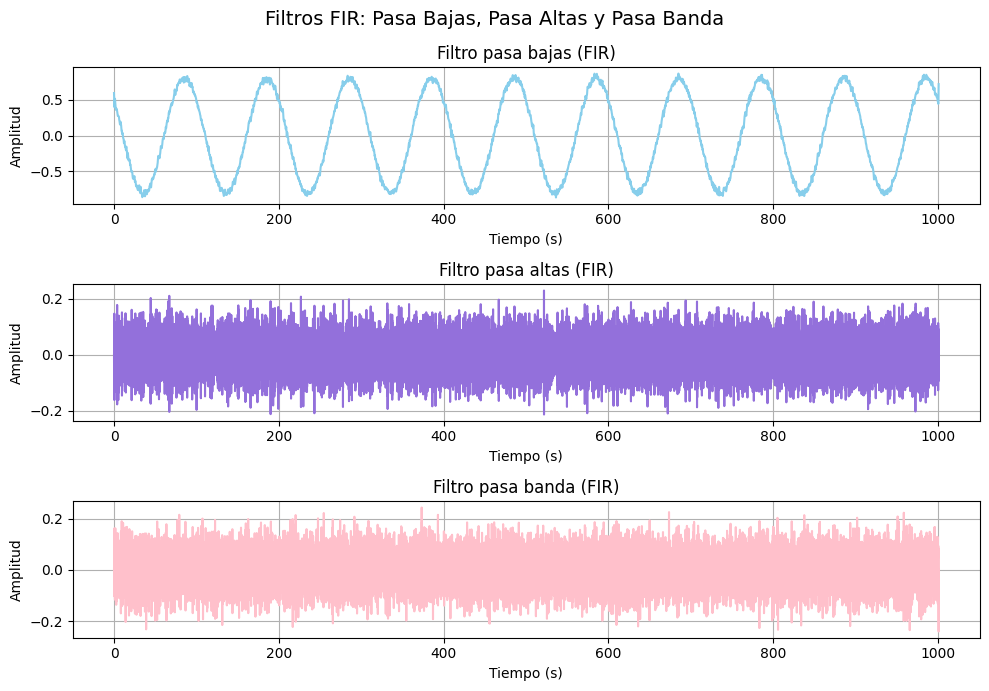

In [ ]:
order = 30 # orden seg√∫n requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_high = 7.5/nyquist #frecuencia de corte normalizada
wn_low = 1.25/nyquist  # Frecuencia de corte normalizada


# Filtro pasa bajas
lowpass = signal.firwin(order+1,wn_low, pass_zero = 'lowpass',window='hamming')
y_f_30 = signal.filtfilt(b=lowpass,a=1,x=y_e)

# Filtro pasa altas
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming')
y_f_high_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicaci√≥n del filtro

# Filtro pasa banda
bandpass=signal.firwin(order+1,[wn_low,wn_high],pass_zero='bandpass',window='hamming')
y_f_band_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicaci√≥n del filtro

# Visualizaci√≥n de las se√±ales filtradas
plt.figure(figsize=(10, 7))
plt.suptitle("Filtros FIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_f_30, color='SKYblue')
plt.title("Filtro pasa bajas (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high_30, color='mediumpurple')
plt.title("Filtro pasa altas (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band_30, color='pink')
plt.title("Filtro pasa banda (FIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

En la gr√°fica se observan tres se√±ales que han sido filtradas mediante filtros FIR de diferentes tipos: pasa bajas, pasa altas y pasa banda. En el primer gr√°fico, correspondiente al filtro pasa bajas, se observa una se√±al senoidal suave, donde solo se conservan las frecuencias bajas, eliminando as√≠ componentes de alta frecuencia y ruido. En el segundo gr√°fico, asociado al filtro pasa altas, se evidencia una se√±al dominada por el ruido de alta frecuencia, lo cual es t√≠pico de este tipo de filtros, que eliminan las frecuencias bajas y permiten pasar solo las componentes de alta frecuencia. Finalmente, el tercer gr√°fico muestra el resultado del filtro pasa banda, donde se conservan √∫nicamente las frecuencias entre los l√≠mites inferior y superior especificados; en este caso, se observa una mezcla de frecuencias bajas y altas, limitando el paso de frecuencias que se encuentran fuera del rango seleccionado. Estas gr√°ficas demuestran c√≥mo cada filtro FIR afecta el contenido frecuencial de la se√±al, permitiendo destacar o suprimir componentes espec√≠ficas seg√∫n el tipo de filtro aplicado.

## Filtro IIR

#### Dise√±e un filtro IIR en las mismas condiciones de los puntos anteriores

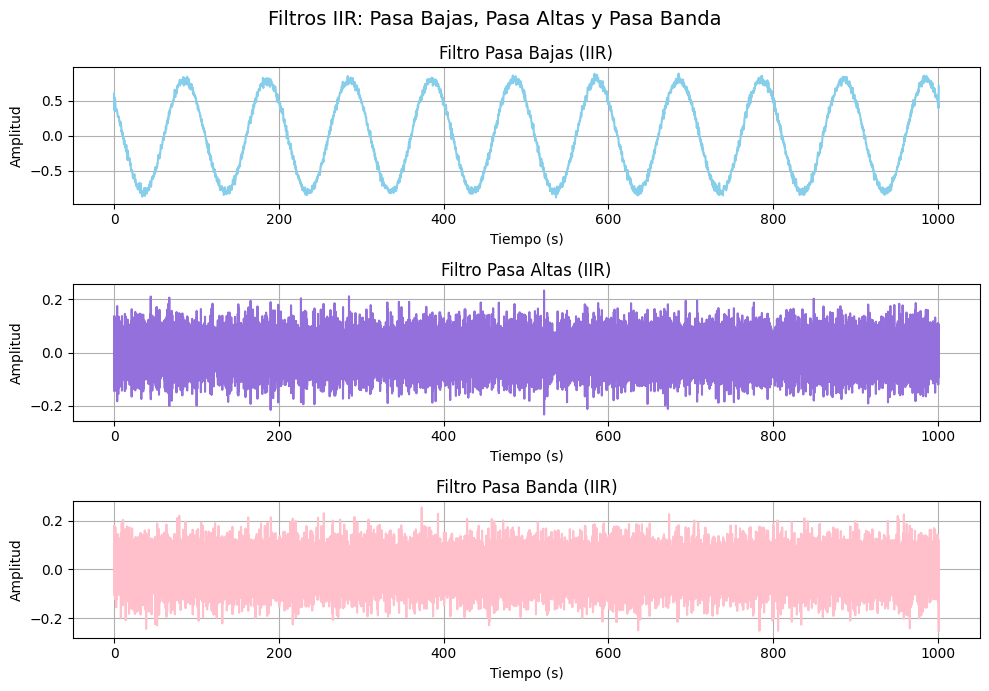

In [ ]:
order = 3 # orden seg√∫n requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_high = 7.5/nyquist #frecuencia de corte normalizada
wn_low = 1.25/nyquist  # Frecuencia de corte normalizada

# Filtro pasa bajas
b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass')
y_f_low = signal.filtfilt(b=b_low,a=a_low,x=y_e)

# Filtro pasa altas
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass')
y_f_high = signal.filtfilt(b=b_high,a=a_high,x=y_e)

# Filtro pasa banda
b_band, a_band = signal.iirfilter(order, [wn_low,wn_high], btype='bandpass')
y_f_band = signal.filtfilt(b=b_band,a=a_band,x=y_e)

# Visualizaci√≥n de las se√±ales
plt.figure(figsize=(10, 7))
plt.suptitle("Filtros IIR: Pasa Bajas, Pasa Altas y Pasa Banda", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_f_low, color='skyblue')
plt.title("Filtro Pasa Bajas (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_high, color='mediumpurple')
plt.title("Filtro Pasa Altas (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_band, color='pink')
plt.title("Filtro Pasa Banda (IIR)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()


En estos gr√°ficos se presentan los resultados de aplicar filtros IIR (Infinite Impulse Response) de distintos tipos: pasa bajas, pasa altas y pasa banda. En el primer gr√°fico, correspondiente al filtro pasa bajas, se observa una se√±al senoidal suavizada, donde solo se conservan las frecuencias bajas, eliminando as√≠ las componentes de alta frecuencia y cualquier ruido asociado. En el segundo gr√°fico, que representa el filtro pasa altas, predominan las componentes de alta frecuencia, lo que refleja la eliminaci√≥n de las frecuencias bajas y la preservaci√≥n de las frecuencias altas en la se√±al. Por √∫ltimo, el tercer gr√°fico muestra el efecto de un filtro pasa banda, que permite el paso √∫nicamente de las frecuencias comprendidas dentro de un rango espec√≠fico; esto se traduce en una se√±al donde hay tanto frecuencias altas como bajas dentro de los l√≠mites del filtro. Comparado con los filtros FIR, los filtros IIR suelen ser m√°s eficientes en t√©rminos de orden para obtener una respuesta similar, aunque pueden presentar una respuesta de fase no lineal. Estas gr√°ficas ilustran claramente c√≥mo los filtros IIR moldean el contenido frecuencial de la se√±al original seg√∫n el tipo de filtro aplicado.

## Comparaci√≥n IIR y FIR:

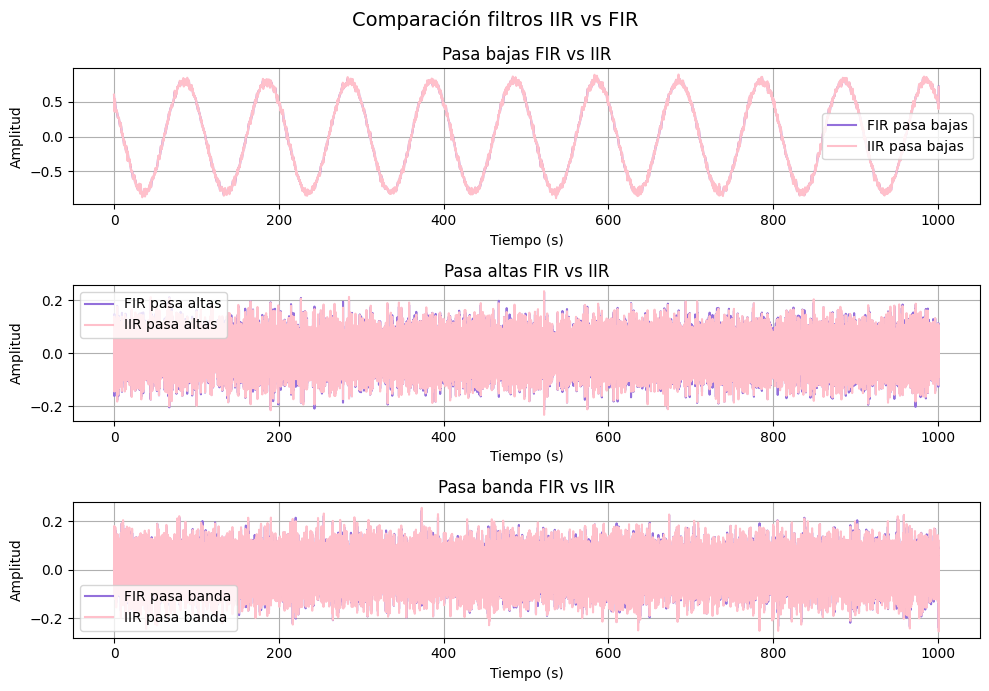

In [ ]:
# Visualizaci√≥n de las se√±ales
plt.figure(figsize=(10, 7))
plt.suptitle("Comparaci√≥n filtros IIR vs FIR", fontsize=14)

# Subplot 1: Pasa bajas FIR vs IIR
plt.subplot(3, 1, 1)
plt.plot(n, y_f_30, color="mediumpurple", label="FIR pasa bajas")
plt.plot(n, y_f_low, color="pink", label="IIR pasa bajas")
plt.title("Pasa bajas FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Subplot 2: Pasa altas FIR vs IIR
plt.subplot(3, 1, 2)
plt.plot(n, y_f_high_30, color="mediumpurple", label="FIR pasa altas")
plt.plot(n, y_f_high, color="pink", label="IIR pasa altas")
plt.title("Pasa altas FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

# Subplot 3: Pasa banda FIR vs IIR
plt.subplot(3, 1, 3)
plt.plot(n, y_f_band_30, color="mediumpurple", label="FIR pasa banda")
plt.plot(n, y_f_band, color="pink", label="IIR pasa banda")
plt.title("Pasa banda FIR vs IIR")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Al comparar los filtros FIR e IIR, se observa que ambos tienen un comportamiento muy similar. En el caso del filtro pasa bajas, ambos permiten el paso de las frecuencias bajas y logran atenuar efectivamente las altas sin distorsionar la forma de onda. Algo parecido ocurre con el filtro pasa altas, donde eliminan las frecuencias bajas y dejan pasar las altas. La diferencia entre el FIR y el IIR en filtros pasa altas puede notarse en detalles finos o en respuestas a cambios r√°pidos, donde el IIR podr√≠a responder m√°s r√°pido, pero no de manera significativa. Con el filtro pasa bandas, los resultados tambi√©n son pr√°cticamente iguales para ambos tipos.

Los filtros IIR suelen generar un desfase ya que no siempre tienen una fase lineal. Sin embargo, en este caso, ambos filtros dieron resultados parecidos porque la frecuencia de corte es la misma y la se√±al tiene frecuencias bien definidas y estables. Esto permite que ambos enfoquen el mismo rango de frecuencias de inter√©s, logrando una respuesta similar. Al seleccionar un orden adecuado para cada filtro, se pueden obtener resultados parecidos, aunque los FIR suelen necesitar un orden mayor. En este an√°lisis, el filtro FIR se dise√±√≥ con un orden alto para que pudiera imitar la respuesta de un filtro IIR, minimizando as√≠ las diferencias entre ellos. Por eso, en aplicaciones de filtrado b√°sico, los resultados de ambos filtros suelen ser casi indistinguibles.

## ¬øQu√© cambios hay en los argumentos de la funci√≥n para implementar un filtro pasa banda y pasa altas?

**Cambios en la funci√≥n para filtros FIR**
1.   Filtro Pasa Altas:

*   Argumento cutoff: Para un filtro pasa altas, se usa una sola frecuencia de corte, en este caso, 7.5 muestras/s.
*   Argumento pass_zero: Debe configurarse como 'highpass'.

Ejemplo:
```
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming')

```
1.   Filtro Pasa Banda:

*   Argumento cutoff: Se debe proporcionar un vector con las frecuencias de corte inferior y superior, por ejemplo, [1.25, 7.5] muestras/s.
*   Argumento pass_zero: Debe establecerse como 'bandpass'.
Ejemplo:

```
bandpass = signal.firwin(order+1, [wn_low, wn_high], pass_zero='bandpass', window='hamming')
```
**Cambios en la funci√≥n para filtros IIR**
1.   Filtro Pasa Altas:

*   Argumento btype: Se debe cambiar a 'highpass'.

Ejemplo:
```
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass')
```
1.   Filtro Pasa Banda:

*   Argumento btype: Se debe ajustar a 'bandpass'.
*   Argumento de frecuencia de corte: Se pasa un vector con las frecuencias de corte inferior y superior, [wn_low, wn_high].
Ejemplo:


```
b_band, a_band = signal.iirfilter(order, [wn_low, wn_high], btype='bandpass')
```


## Funci√≥n respuesta en frecuencia de un filtro digital

In [ ]:
def mfreqz(b,a,order,nyq_rate = 1):

    """
    Plot the impulse response of the filter in the frequency domain

    Parameters:

        b: numerator values of the transfer function (coefficients of the filter)
        a: denominator values of the transfer function (coefficients of the filter)

        order: order of the filter

        nyq_rate = nyquist frequency
    """

    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

## Respuesta en frecuencia del filtro FIR pasa bajas de orden 30

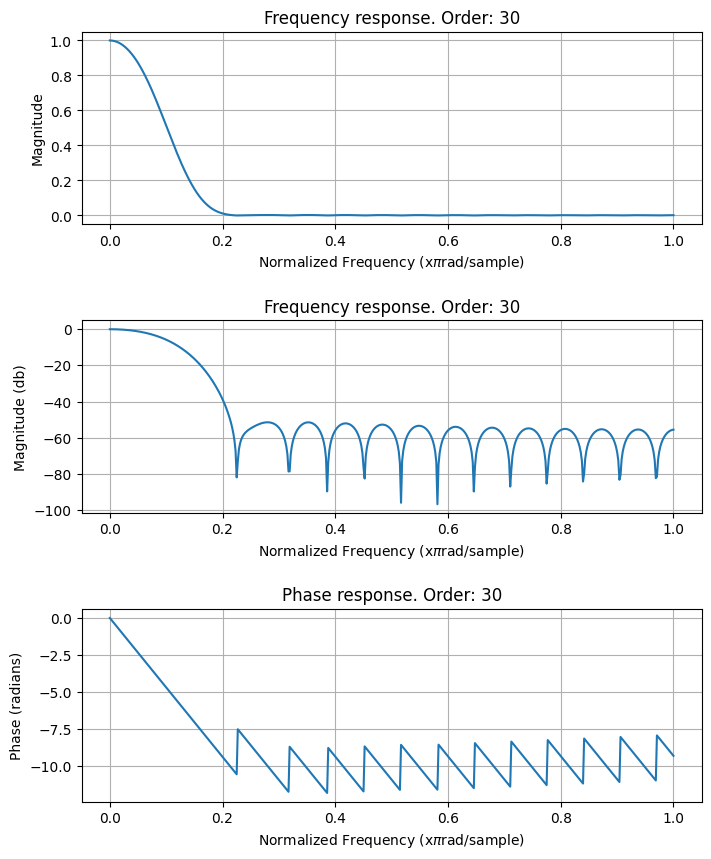

In [ ]:
mfreqz(b=lowpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de frecuencias bajas y aten√∫a de manera efectiva las frecuencias altas, confirmando su funcionamiento como un filtro pasa bajas.

2. Magnitud en Decibeles (dB):

  La escala logar√≠tmica facilita la visualizaci√≥n de la atenuaci√≥n de frecuencias altas, mostrando una reducci√≥n r√°pida despu√©s de la frecuencia de corte. Esto cuantifica la eficacia del filtro al suprimir frecuencias no deseadas.

3. Respuesta en Fase:

  La fase lineal del filtro es consistente en frecuencias bajas, lo cual es ventajoso para aplicaciones que requieren una se√±al sin distorsiones de fase, caracter√≠stica t√≠pica de los filtros FIR.

## Respuesta en frecuencia de un filtro FIR pasa altas de orden 30

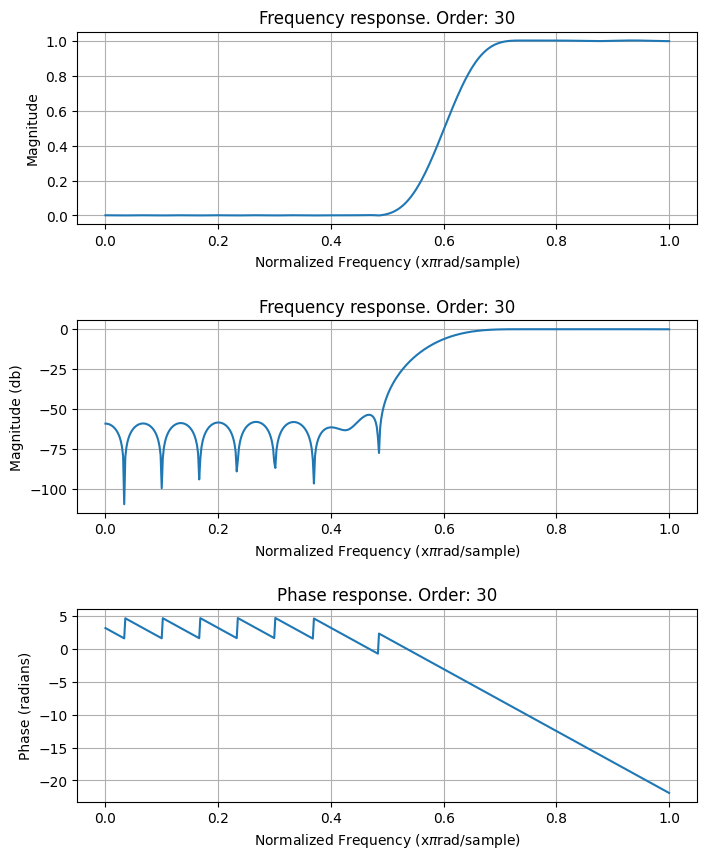

In [ ]:
mfreqz(b=highpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de frecuencias altas y aten√∫a eficazmente las frecuencias bajas, confirmando su comportamiento como un filtro pasa altas.

2. Magnitud en Decibeles (dB):

  La escala logar√≠tmica facilita la visualizaci√≥n de la atenuaci√≥n de frecuencias bajas, mostrando una ganancia significativa en frecuencias superiores a la frecuencia de corte. Esto demuestra la efectividad del filtro en la amplificaci√≥n de frecuencias altas.

3. Respuesta en Fase:

  La fase lineal del filtro es consistente en frecuencias altas, lo cual es ventajoso para aplicaciones que requieren preservar la forma de la se√±al sin distorsiones de fase, caracter√≠stica t√≠pica de los filtros FIR.

## Respuesta en frecuencia de un filtro FIR pasa banda de orden 30

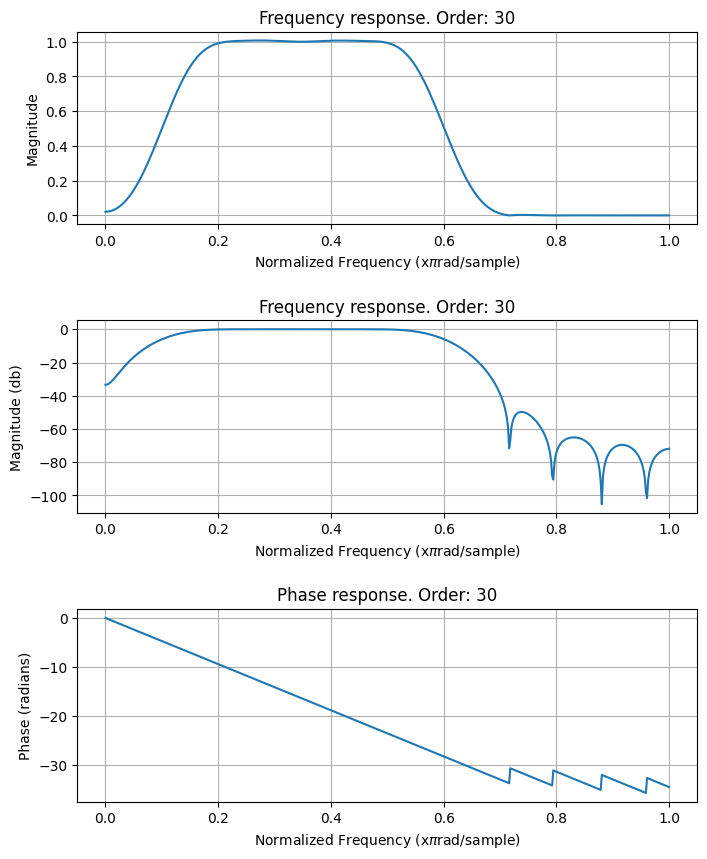

In [ ]:
mfreqz(b=bandpass,a=1,order=30)

1. Magnitud de la Respuesta en Frecuencia:

  El filtro permite el paso de un rango de frecuencias intermedias, mientras aten√∫a eficazmente las frecuencias bajas y altas, confirmando su funcionamiento como un filtro pasa banda.

2. Magnitud en Decibeles (dB):

  La escala logar√≠tmica facilita la visualizaci√≥n de la atenuaci√≥n tanto en frecuencias bajas como altas, mostrando una ganancia unitaria en la banda de paso. Esto demuestra la efectividad del filtro en suprimir frecuencias fuera del rango deseado.

3. Respuesta en Fase:
  
  La fase es lineal en la banda de paso, lo que es ventajoso para aplicaciones que requieren mantener la forma de la se√±al en las frecuencias intermedias, caracter√≠stica t√≠pica de los filtros FIR.

## Filtrado lfilter y filtfilt - FIR

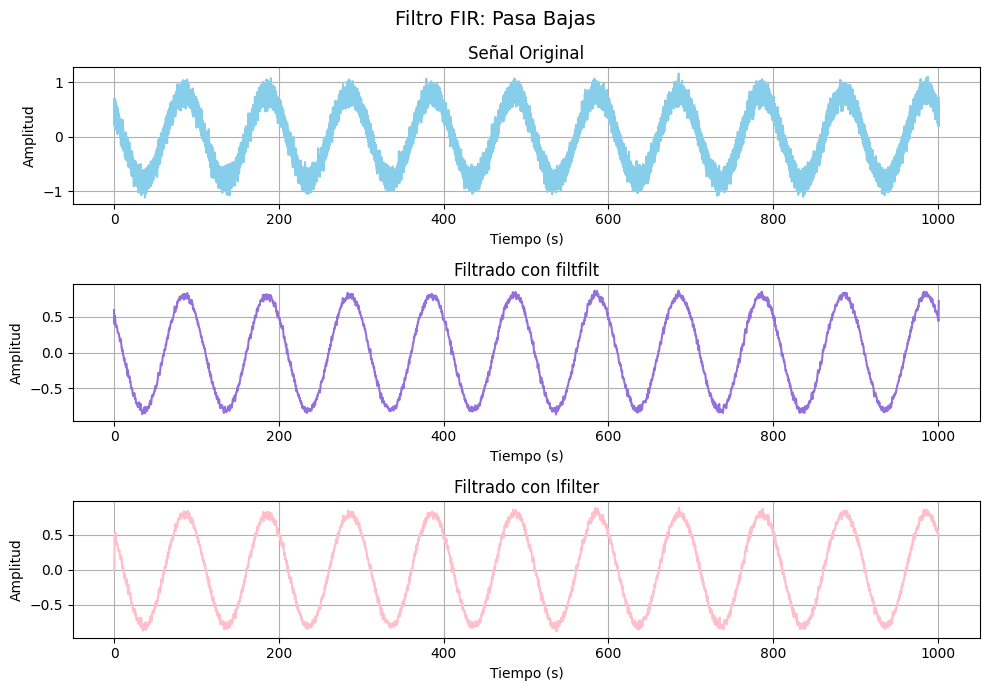

In [ ]:
y_lf_30 = signal.lfilter(b=lowpass, a=1, x=y_e)

# Gr√°fico comparativo en 3 subplots

plt.figure(figsize=(10, 7))
plt.suptitle("Filtro FIR: Pasa Bajas", fontsize=14)

# Subplot 1: Pasa bajas FIR vs IIR
plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='skyblue')
plt.title("Se√±al Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid(True)

# Subplot 2: Filtrado con filtfilt
plt.subplot(3, 1, 2)
plt.plot(n, y_f_30, label="Filtrado (filtfilt)", color="mediumpurple")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtrado con filtfilt")
plt.grid(True)

# Subplot 3: Filtrado con lfilter
plt.subplot(3, 1, 3)
plt.plot(n, y_lf_30, label="Filtrado (lfilter)", color="pink")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Filtrado con lfilter")
plt.grid(True)

# Ajustar espaciado
plt.tight_layout()
plt.show()


1. ¬øPor qu√© se utiliza s√≥lo el numerador? ¬øA qu√© hace referencia el numerador?
   - En un filtro FIR (Finite Impulse Response), solo se utiliza el numerador porque estos filtros no tienen t√©rminos de realimentaci√≥n, es decir, no tienen coeficientes en el denominador. El numerador hace referencia a los coeficientes del filtro, que determinan c√≥mo se realiza la convoluci√≥n con la se√±al de entrada para obtener la se√±al filtrada [2].

2. ¬øEvidencia cambios en el uso de las funciones de filtrado?
   - No, las funciones `lfilter` y `filtfilt` producen resultados similares al aplicar el filtro FIR a la misma se√±al. Esto se podr√≠as explicar porque en algunas se√±ales y configuraciones de filtro, la diferencia entre ambos m√©todos puede no ser tan evidente en t√©rminos visuales, especialmente si el filtro no altera significativamente la fase o si la se√±al es simple y sim√©trica. Sin embargo, aunque los gr√°ficos se vean similares, filtfilt usualmente preserva mejor la forma original de la se√±al en comparaci√≥n con lfilter debido a la correcci√≥n de fase. Lo que normalmente sucede es que [3]:

     - `lfilter`: Filtra la se√±al en una sola direcci√≥n, lo que puede introducir un desfase en la se√±al resultante.
     - `filtfilt`: Aplica el filtro en ambas direcciones, lo que elimina el desfase y mejora la respuesta en fase, logrando un resultado m√°s preciso.

3. ¬øC√≥mo se puede explicar la falta de coincidencia?
   - La falta de coincidencia entre los resultados de `lfilter` y `filtfilt` se debe a que `lfilter` introduce un desfase en la se√±al, mientras que `filtfilt` lo elimina al filtrar en ambas direcciones. Esto es importante en aplicaciones donde se requiere preservar la forma de la se√±al sin distorsi√≥n de fase.

4. ¬øEs adecuado el orden del filtro usado?
   - S√≠, el orden de 30 es adecuado para el filtro FIR, ya que proporciona una transici√≥n suficientemente abrupta entre la banda de paso y la banda de atenuaci√≥n, manteniendo una respuesta de fase lineal. Sin embargo, filtros de orden m√°s bajo podr√≠an usarse si se busca una implementaci√≥n m√°s r√°pida con una menor complejidad computacional, aunque con una atenuaci√≥n menos efectiva en la banda de parada.

## Filtrado lfilter y filtfilt - IIR

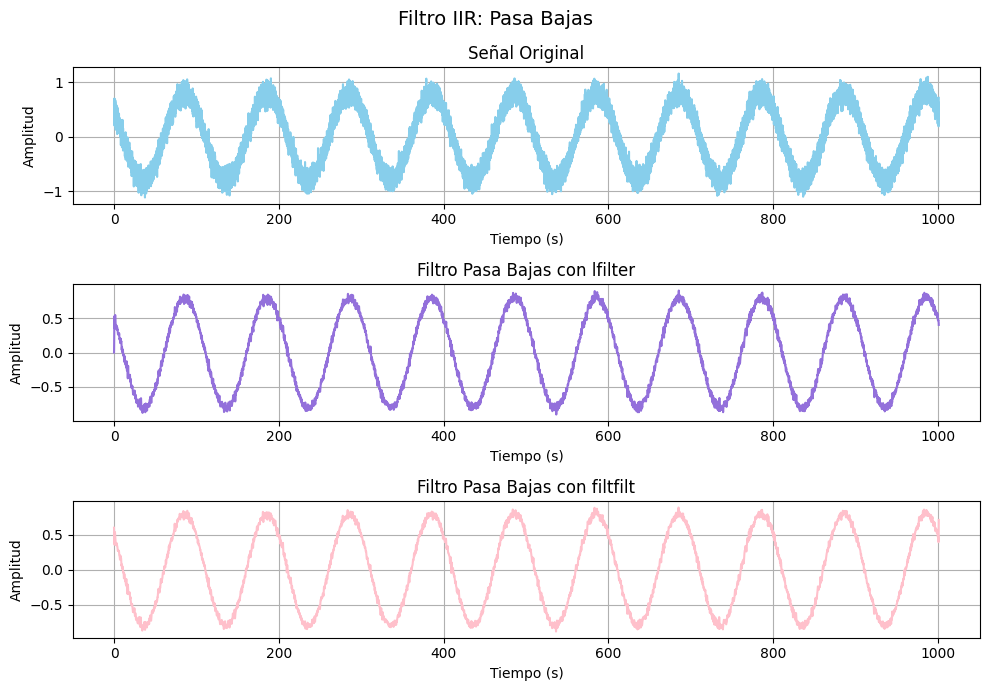

In [ ]:
y_f_lfilter = signal.lfilter(b=b_low,a=a_low,x=y_e)  # Usando lfilter

# Visualizaci√≥n de las se√±ales filtradas
plt.figure(figsize=(10, 7))
plt.suptitle("Filtro IIR: Pasa Bajas", fontsize=14)

plt.subplot(3, 1, 1)
plt.plot(n, y_e, color='skyblue')
plt.title("Se√±al Original")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(n, y_f_lfilter, color='mediumpurple')
plt.title("Filtro Pasa Bajas con lfilter")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(n, y_f_low, color='pink')
plt.title("Filtro Pasa Bajas con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.grid()

plt.tight_layout()
plt.show()

1. ¬øPor qu√© se utiliza el numerador y denominador?
   - En un filtro IIR (Infinite Impulse Response), se utilizan tanto el numerador como el denominador porque estos filtros incluyen t√©rminos de realimentaci√≥n.
   - El numerador representa los coeficientes de la parte no recursiva del filtro (la parte que afecta directamente a la se√±al de entrada).
   - El denominador representa los coeficientes de la parte recursiva (la retroalimentaci√≥n), que permite que la salida del filtro dependa de valores anteriores de la se√±al filtrada, lo que proporciona una respuesta m√°s eficiente y m√°s r√°pida a frecuencias espec√≠ficas en comparaci√≥n con los filtros FIR.

2. ¬øEs necesario cambiar el orden del filtro?
   - Para filtros IIR, un orden m√°s bajo suele ser adecuado, ya que estos filtros logran una transici√≥n m√°s abrupta entre la banda de paso y la banda de atenuaci√≥n, incluso con un orden m√°s bajo, gracias a la realimentaci√≥n.
   - En este caso, el filtro IIR de orden 3 es suficiente para proporcionar una buena atenuaci√≥n en las frecuencias indeseadas y un paso adecuado en la banda de inter√©s.
   - Aumentar el orden puede introducir inestabilidades y amplificaci√≥n de ruido, por lo que generalmente no es recomendable en los filtros IIR a menos que sea estrictamente necesario para mejorar la selectividad del filtro.

#Aplicaci√≥n:

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Biose√±ales/P6/senal_filtros.txt'
data = np.loadtxt(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Periodograma de Welch

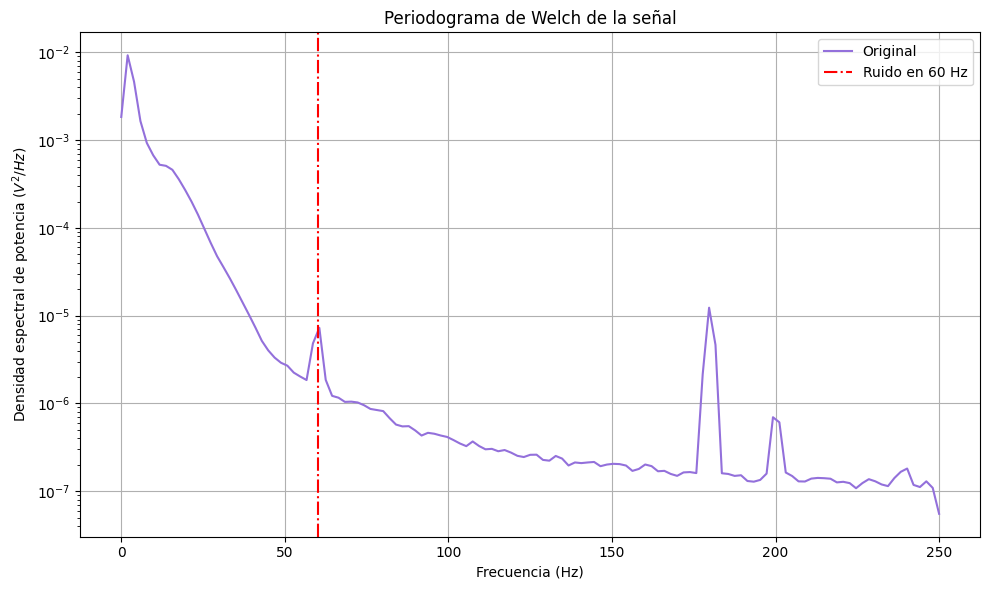

In [ ]:
canal = data[:, 0]
Fs = 500
frequencies, power_spectrum = signal.welch(canal, fs=Fs)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_spectrum, label='Original', color = "mediumpurple")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch de la se√±al')
plt.axvline(x=60, color='red', linestyle='-.', label='Ruido en 60 Hz')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

El an√°lisis del periodograma de Welch muestra la densidad espectral de potencia de la se√±al en funci√≥n de la frecuencia. En la gr√°fica, se observa un pico claro en la densidad espectral en 60 Hz, lo que indica la presencia de ruido el√©ctrico asociado a la red el√©ctrica, t√≠pico en sistemas de 60 Hz. Este pico revela una componente significativa de ruido en la se√±al, lo cual es com√∫n en entornos donde las se√±ales el√©ctricas pueden introducir interferencia no deseada [1].

En t√©rminos generales, el periodograma evidencia que la densidad espectral de potencia es m√°s alta en las frecuencias bajas, lo cual es caracter√≠stico de se√±ales que concentran m√°s energ√≠a en estas componentes. A medida que la frecuencia aumenta, la densidad espectral disminuye, aunque se detectan algunos picos adicionales que corresponden a otras frecuencias relevantes dentro de la se√±al.

Para mitigar este ruido y mejorar la calidad de la se√±al, se podr√≠a considerar la aplicaci√≥n de un filtro notch o un filtro pasa banda estrecho centrado en 60 Hz, lo que permitir√≠a eliminar esta interferencia sin afectar significativamente otras componentes de la se√±al.

## Filtro FIR que permita eliminar el ruido

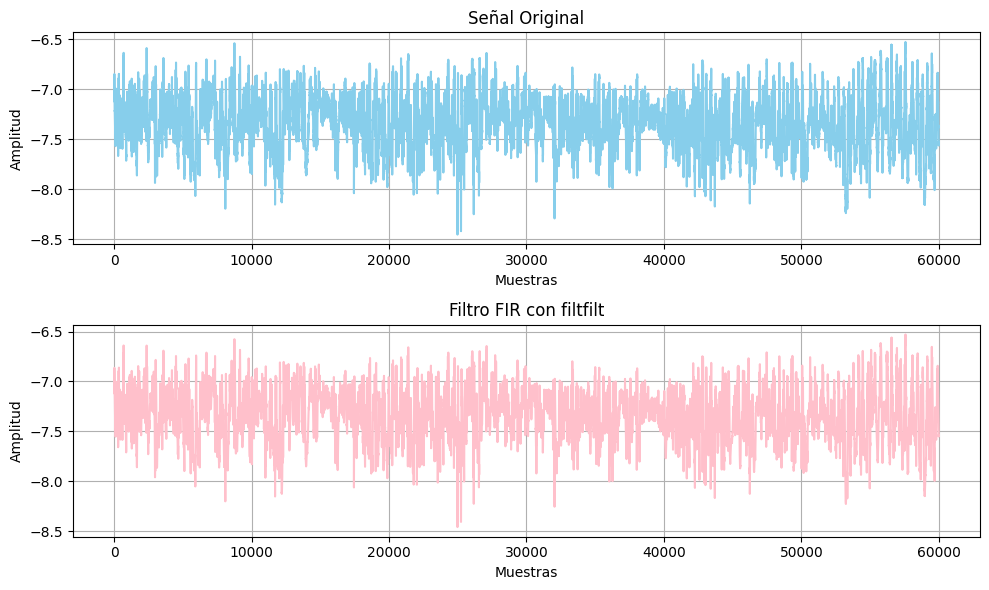

In [ ]:
# Dise√±o del filtro FIR
order = 30
nyquist = Fs/2 # frecuencia de nyquist
wn = 60/nyquist
b_fir = signal.firwin(order + 1, wn, window='hamming')

# Aplicar el filtro FIR a la se√±al
y_filtred = signal.filtfilt(b=b_fir, a=1, x=canal)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(canal, color='skyblue')
plt.title('Se√±al Original')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.grid()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(y_filtred, color='pink')
plt.title("Filtro FIR con filtfilt")
plt.ylabel("Amplitud")
plt.xlabel("Muestras")
plt.grid()
plt.tight_layout()

Los cambios no son muy evidentes a simple vista en la comparaci√≥n directa de las se√±ales. Para observar los cambios de manera m√°s clara, ser√≠a necesario graficar el periodograma de Welch nuevamente. Este an√°lisis espectral permitir√° ver si el filtro ha reducido efectivamente la potencia en las frecuencias no deseadas, especialmente la componente de ruido en 60 Hz, y mostrar la mejora en la densidad espectral de potencia tras el filtrado.

## Comparaci√≥n se√±al original vs filtrada - Periodograma welch

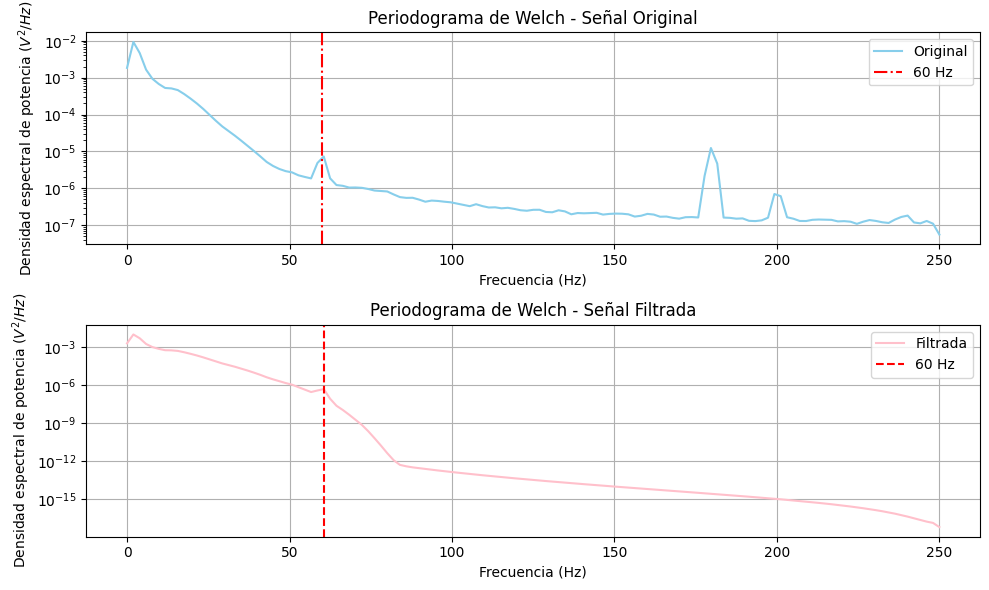

In [ ]:
b_fir = signal.firwin(order + 1, wn, window='hamming')
y_filtred = signal.filtfilt(b=b_fir, a=1, x=canal)
frequencies, power_spectrum_original = signal.welch(canal, fs=Fs)
frequencies_filtered, power_spectrum_filtered = signal.welch(y_filtred, fs=Fs)

plt.figure(figsize=(10, 6))

# Periodograma de la se√±al original
plt.subplot(2, 1, 1)
plt.semilogy(frequencies, power_spectrum_original, label='Original', color ="skyblue")
plt.axvline(x=60, color='red', linestyle='-.', label='60 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch - Se√±al Original')
plt.legend()
plt.grid()

# Periodograma de la se√±al filtrada
plt.subplot(2, 1, 2)
plt.semilogy(frequencies_filtered, power_spectrum_filtered, label='Filtrada', color='pink')
plt.axvline(x=60.5, color='red', linestyle='--',label='60 Hz')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia $(V^2/Hz)$')
plt.title('Periodograma de Welch - Se√±al Filtrada')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

S√≠, hay cambios significativos tras aplicar el filtro FIR. En el periodograma de Welch de la se√±al filtrada, el pico a 60 Hz, que indicaba la presencia de ruido el√©ctrico, ha sido notablemente atenuado o eliminado. Esto demuestra que el filtro fue eficaz en suprimirse la interferencia a esa frecuencia espec√≠fica. Adicionalmente, la densidad espectral de potencia general disminuye considerablemente, lo que indica una reducci√≥n del ruido en la se√±al filtrada, confirmando la mejora en su limpieza espectral.

In [ ]:
#Tama√±o de canal_1
print("Tama√±o del canal 1:", canal.shape)

Tama√±o del canal 1: (60000,)


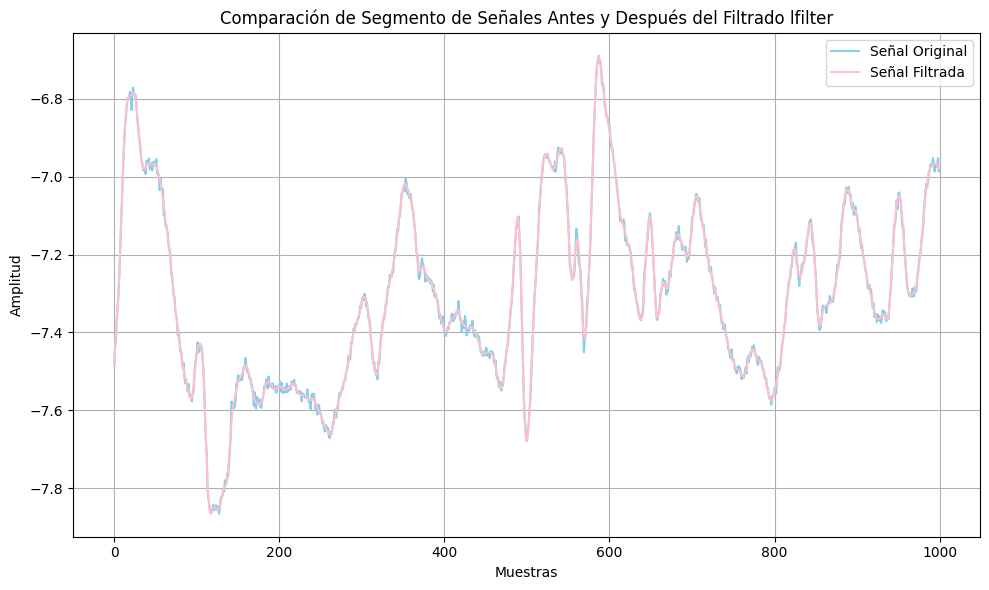

In [ ]:
# Segmento de la se√±al
start = 3000
end = 4000
segment_original = canal[start:end]
segment_filtrado = y_filtred[start:end]

# Graficar el segmento de las se√±ales
plt.figure(figsize=(10, 6))
plt.plot(segment_original, color='skyblue', label='Se√±al Original')
plt.plot(segment_filtrado, color='pink', label='Se√±al Filtrada')
plt.title('Comparaci√≥n de Segmento de Se√±ales Antes y Despu√©s del Filtrado lfilter')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

El gr√°fico muestra un segmento de las se√±ales antes y despu√©s del filtrado con el filtro FIR, lo que permite observar los cambios en la amplitud despu√©s del proceso de filtrado. Aunque la forma de la se√±al se conserva, se evidencia una ligera reducci√≥n en la amplitud de la se√±al filtrada, lo que indica la eliminaci√≥n de ciertas componentes de ruido, especialmente la de 60 Hz, preservando las caracter√≠sticas principales de la se√±al original. Esto confirma la eficacia del filtro FIR en la reducci√≥n del ruido, manteniendo la integridad de la se√±al.

## Referencias

[1] John G. Webster, Medical Instrumentation: Application and Design, 4th ed., Wiley, 2009.

[2] Proakis, J. G., & Manolakis, D. G. (2006). "Digital Signal Processing: Principles, Algorithms, and Applications."

[3] DSP Stack Exchange. ‚ÄúApplying Filter in Scipy Signal: Use lfilter or filtfilt?‚Äù Stack Exchange, 2014. [Online]. Available: https://dsp.stackexchange.com/questions/19084/applying-filter-in-scipy-signal-use-lfilter-or-filtfilt. [Accessed: 31-Oct-2024].